<a href="https://colab.research.google.com/github/axstiz/AD_practices/blob/master/qq/Homeworks/RandomForest/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Выполнение д/з с Random Forest


#### Импорты


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#### Работа с данными


Базовые признаки для выбора из датасетов


In [2]:
base_features = [
    "PassengerId",
    "Pclass",
    "Sex",
    "Age",
    "SibSp",
    "Parch",
    "Fare",
    "Embarked",  # Это куда посадили на борту
    "Survived",
]

Загрузка данных из датасетов


In [5]:
train_df = pd.read_csv("./titanic_train.csv")[base_features]

test_df = pd.read_csv("./titanic_test.csv")[base_features[:-1]]

gender_submission = pd.read_csv("./gender_submission.csv")

print(f"{train_df.shape=}")
print(f"{test_df.shape=}")

train_df.shape=(891, 9)
test_df.shape=(418, 8)


Функция для обработки данных


In [6]:
def process_df(df: pd.DataFrame, is_train=True) -> pd.DataFrame:
    updated_df = df.copy()

    le_sex = LabelEncoder()
    updated_df["Sex"] = le_sex.fit_transform(df["Sex"])

    le_embarked = LabelEncoder()
    updated_df["Embarked"] = le_embarked.fit_transform(df["Embarked"])

    updated_df["Family"] = updated_df["SibSp"] + updated_df["Parch"] + 1
    updated_df["Fare"] = updated_df.groupby("Pclass")["Fare"].transform(
        lambda x: x.fillna(x.median())
    )

    if "Sex" in updated_df.columns:
        updated_df["Age"] = updated_df.groupby(["Pclass", "Sex"])[
            "Age"
        ].transform(lambda x: x.fillna(x.median()))

    updated_features = [
        "Pclass",
        "Sex",
        "Age",
        "Family",
        "Embarked",
        "Fare",
    ]

    if "Survived" in updated_df.columns:
        updated_features.append("Survived")

    return updated_df[updated_features]

Обработка и разделение


In [7]:
cleared_train_df = process_df(train_df)
train_X = cleared_train_df.iloc[:, :-1]
train_y = cleared_train_df["Survived"]

X_train, X_val, y_train, y_val = train_test_split(
    train_X,
    train_y,
    test_size=0.2,
    random_state=42,
    stratify=train_y,
)

print(f"\nРазмеры данных после split:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_val: {y_val.shape}")


Размеры данных после split:
X_train: (712, 6)
X_val: (179, 6)
y_train: (712,)
y_val: (179,)


#### Обучение модели


In [8]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    min_samples_split=10,
    min_samples_leaf=4,
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

Проверка на валидационной выборке


In [9]:
y_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print(f"\nAccuracy на валидации: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred))


Accuracy на валидации: 0.7933
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       110
           1       0.83      0.58      0.68        69

    accuracy                           0.79       179
   macro avg       0.81      0.75      0.77       179
weighted avg       0.80      0.79      0.78       179



Проверка на тестовых данных


In [10]:
cleared_test_df = process_df(test_df)

test_pred = rf_model.predict(cleared_test_df)

test_accuracy = accuracy_score(gender_submission["Survived"], test_pred)

print(f"\nAccuracy на тестовых данных: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(gender_submission["Survived"], test_pred))


Accuracy на тестовых данных: 0.9019
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       266
           1       0.93      0.79      0.85       152

    accuracy                           0.90       418
   macro avg       0.91      0.88      0.89       418
weighted avg       0.90      0.90      0.90       418



In [13]:
submission_df = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": test_pred,
})
submission_df.to_csv("my_submission.csv", index=False)

print("Файл submission.csv успешно создан.")

Файл submission.csv успешно создан.


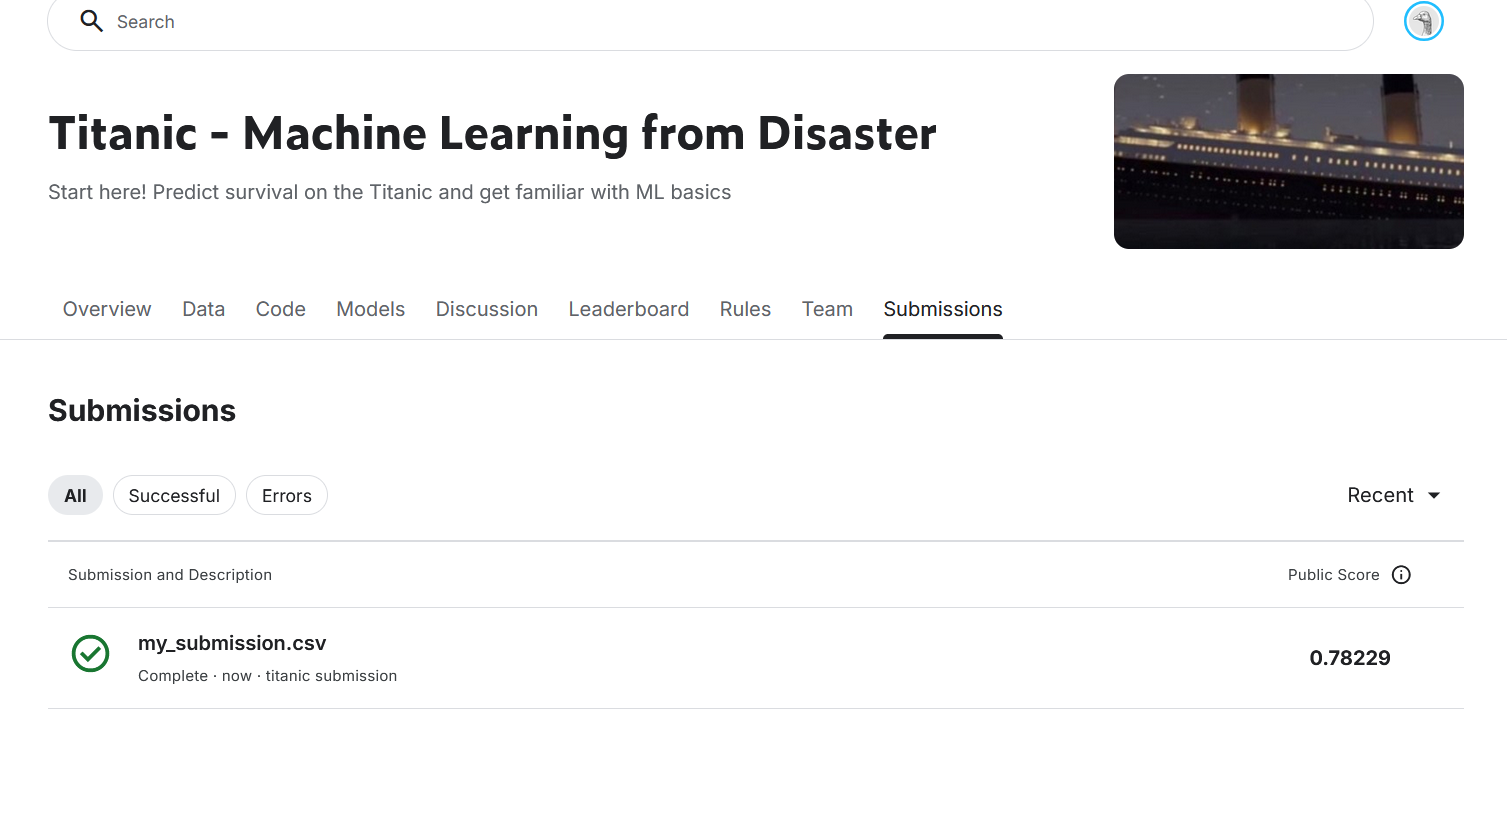![изображение.png]()